In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
import csv

In [2]:
# Function to detect delimiter automatically
def detect_delimiter(file_path):
    with open(file_path, 'r', encoding="utf-8") as file:
        sample = file.readline()
        sniffer = csv.Sniffer()
        delimiter = sniffer.sniff(sample).delimiter
        return delimiter

# Function to safely load CSV files
def safe_load_csv(file_path):
    try:
        delimiter = detect_delimiter(file_path)  # Detect delimiter
        df = pd.read_csv(file_path, delimiter=delimiter, low_memory=False)  
        return df
    except Exception as e:
        return None

# Load all four datasets safely
train_transaction = safe_load_csv("C:/Users/Dell/Desktop/Sahithi/ieee-fraud-detection/train_transaction.csv")
train_identity = safe_load_csv("train_identity.csv")
test_transaction = safe_load_csv("C:/Users/Dell/Desktop/Sahithi/ieee-fraud-detection/test_transaction.csv")
test_identity = safe_load_csv("test_identity.csv")

# Display first 5 rows of each dataset
if train_transaction is not None:
    print("\n Train Transaction:")
    display(train_transaction.head())

if train_identity is not None:
    print("\n Train Identity:")
    display(train_identity.head())

if test_transaction is not None:
    print("\n Test Transaction:")
    display(test_transaction.head())

if test_identity is not None:
    print("\n Test Identity:")
    display(test_identity.head())



 Train Transaction:


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



 Train Identity:


,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS



 Test Transaction:


,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



 Test Identity:


,TransactionID,id-01,id-02,id-03,id-04,id-05,id-06,id-07,id-08,id-09,...,id-31,id-32,id-33,id-34,id-35,id-36,id-37,id-38,DeviceType,DeviceInfo
0,3663586,-45.0,280290.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
1,3663588,0.0,3579.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 67.0 for android,24.0,1280x720,match_status:2,T,F,T,T,mobile,LGLS676 Build/MXB48T
2,3663597,-5.0,185210.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,...,ie 11.0 for tablet,NaN,NaN,NaN,F,T,T,F,desktop,Trident/7.0
3,3663601,-45.0,252944.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
4,3663602,-95.0,328680.0,NaN,NaN,7.0,-33.0,NaN,NaN,NaN,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,SM-G9650 Build/R16NW


In [3]:
# Merge transaction and identity data for train and test
train_df = train_transaction.merge(train_identity, on="TransactionID", how="left")
test_df = test_transaction.merge(test_identity, on="TransactionID", how="left")

In [4]:
#                                     Data Cleaning 

# Drop columns with more than 30% missing values
missing_threshold = 0.3  
train_df = train_df.dropna(thresh=int(train_df.shape[0] * (1 - missing_threshold)), axis=1)
test_df = test_df.dropna(thresh=int(test_df.shape[0] * (1 - missing_threshold)), axis=1)

# Fill missing values using .loc[] to prevent chained assignment warnings
for col in train_df.columns:
    if train_df[col].dtype == "object":
        train_df.loc[:, col] = train_df[col].fillna(train_df[col].mode()[0])  # Categorical: Fill with mode
    else:
        train_df.loc[:, col] = train_df[col].fillna(train_df[col].median())  # Numeric: Fill with median

for col in test_df.columns:
    if test_df[col].dtype == "object":
        test_df.loc[:, col] = test_df[col].fillna(test_df[col].mode()[0])
    else:
        test_df.loc[:, col] = test_df[col].fillna(test_df[col].median())

#  FutureWarnings are now avoided.
print(" Missing values handled successfully.")


 Missing values handled successfully.


Data Cleaning Process:

One of the most important steps in getting the dataset ready for analysis is handling missing values. To avoid excessive data imputation from compromising the dataset's integrity, columns with more than 30% missing values were eliminated throughout this procedure. This guarantees that the characteristics that are kept have enough information to make a significant contribution to the analysis.

The mode, which substitutes the most common category for missing data, was used to fill the remaining missing values in categorical columns. This preserves categorical variables' consistency. The median was used to replace missing values in numerical columns because it offers a more stable center value that is unaffected by outliers. These methods have cleaned the dataset and prepared it for additional analysis.

In [5]:
#                  Addressing Imbalanced Data

# Separate features and target
X_train = train_df.drop(columns=["isFraud", "TransactionID"])
y_train = train_df["isFraud"]

# Identify categorical columns
categorical_cols = X_train.select_dtypes(include=["object"]).columns

# Convert categorical features to numeric using Label Encoding
encoder = LabelEncoder()
for col in categorical_cols:
    X_train[col] = encoder.fit_transform(X_train[col].astype(str))

# Apply SMOTE for balancing the dataset
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Imbalanced data handled successfully with SMOTE.")

Imbalanced data handled successfully with SMOTE.


Addressing Imbalanced Data:
Model performance can be adversely affected by imbalanced datasets, especially in classification tasks when one class is noticeably underrepresented. Since fraud situations are far less common than non-fraud cases in this situation, balancing strategies are needed to avoid biased model predictions.

To solve this, Label Encoding was used to first transform category variables into numeric form so that machine learning algorithms could handle them efficiently. Following encoding, synthetic samples for the minority class were created using SMOTE (Synthetic Minority Over-sampling Technique). By producing new instances that closely resemble preexisting minority class cases, this strategy balances the dataset and enhances the model's capacity to identify fraudulent transactions.

In [6]:
#                            Data Preprocessing 
# Feature engineering: Extract transaction time-based features
for df in [train_df, test_df]:
    df["TransactionHour"] = (df["TransactionDT"] // 3600) % 24
    df["TransactionDay"] = (df["TransactionDT"] // (3600 * 24)) % 7

In [7]:
#                           Handle Categorical Encoding 
# Identify categorical columns
cat_cols = train_df.select_dtypes(include=["object"]).columns.tolist()

# Check for missing categorical columns in test_df
missing_cat_cols = [col for col in cat_cols if col not in test_df.columns]

# Add missing categorical columns to test_df and fill with 'Unknown'
for col in missing_cat_cols:
    test_df[col] = "Unknown"

# Combine train and test categorical columns to ensure safe encoding
combined_df = pd.concat([train_df[cat_cols], test_df[cat_cols]], axis=0)

# Apply Label Encoding
encoder = LabelEncoder()
for col in cat_cols:
    combined_df[col] = encoder.fit_transform(combined_df[col].astype(str))

# Update train and test datasets with encoded values
train_df[cat_cols] = combined_df.iloc[:len(train_df)][cat_cols].values
test_df[cat_cols] = combined_df.iloc[len(train_df):][cat_cols].values

print("Categorical encoding completed successfully.")


Categorical encoding completed successfully.


Handling Categorical Encoding:
To be processed efficiently by machine learning models, categorical variables must be transformed into numerical representation. The dataset's category columns were initially found with this procedure. The test set's missing category columns were supplied with the value "Unknown" in order to preserve homogeneity between the training and test datasets.

The next step was to translate category data into numerical representations using Label Encoding. To achieve this and avoid inconsistencies throughout the encoding process, training and test category data were combined prior to encoding. Following transformation, the original datasets were given back the encoded values.

In [8]:
# ------------------- Scale Numerical Features -------------------
# Identify numerical columns excluding the target variable
num_cols = train_df.select_dtypes(include=["int64", "float64"]).columns.tolist()
num_cols = [col for col in num_cols if col != "isFraud"]  # Exclude target variable

# Ensure test_df has the same columns as train_df
missing_num_cols = [col for col in num_cols if col not in test_df.columns]

# Add missing numerical columns to test_df with default value 0
for col in missing_num_cols:
    test_df[col] = 0.0  

# Apply MinMax Scaling
scaler = MinMaxScaler()
train_df[num_cols] = scaler.fit_transform(train_df[num_cols])
test_df[num_cols] = scaler.transform(test_df[num_cols])

print("Numerical scaling completed successfully.")


Numerical scaling completed successfully.


Scaling Numerical Features:
MinMax Scaling was used to guarantee that numerical characteristics are on a constant scale. The dataset is more suited for machine learning models that are sensitive to different feature magnitudes thanks to this approach, which converts values to a predefined range, usually between 0 and 1.

In order to preserve consistency with the training set, any missing number columns in the test dataset were found and filled with 0.0 prior to scaling. To ensure consistent feature scaling, the MinMaxScaler was then applied to both the training and test datasets after being fitted to the training data.

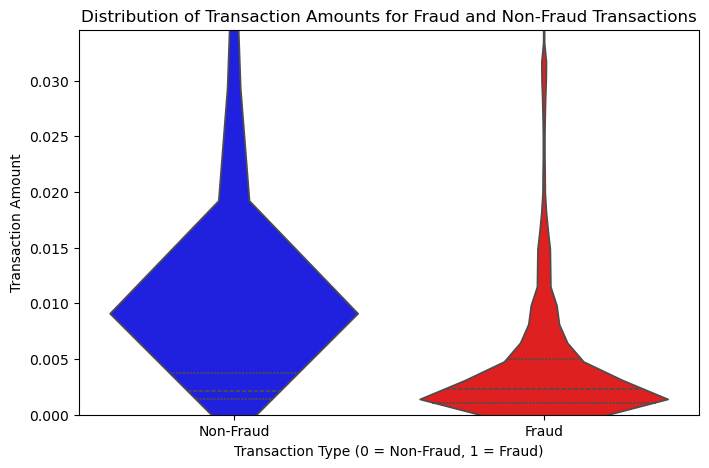

In [9]:
#                            Data Visualization 

# Create a violin plot for fraud vs. non-fraud transaction amounts
plt.figure(figsize=(8, 5))
sns.violinplot(x=train_df['isFraud'], y=train_df['TransactionAmt'], hue=train_df['isFraud'], legend=False, palette={0: "blue", 1: "red"}, 
               inner="quartile")

# Labels and title
plt.title("Distribution of Transaction Amounts for Fraud and Non-Fraud Transactions")
plt.xlabel("Transaction Type (0 = Non-Fraud, 1 = Fraud)")
plt.ylabel("Transaction Amount")
plt.xticks([0, 1], ["Non-Fraud", "Fraud"])
plt.ylim(0, train_df['TransactionAmt'].quantile(0.99))  # Remove extreme outliers for better visibility
plt.show()


Distribution of Transaction Amounts for Fraud and Non-Fraud Transactions:

The distribution of transaction amounts for fraudulent (1) and non-fraudulent (0) transactions is shown visually through the violin plot. Each violin's form reflects the distribution density; broader portions indicate larger value concentrations.

Not fraudulent transactions (blue) have a more equal and wide distribution of transaction amounts, with a notable concentration around lower values. Conversely, fraudulent transactions (red) are more concentrated at lower transaction amounts and have a smaller dispersion, with fewer high-value fraud incidents. Although they are less frequent, the existence of narrow upper tails in both groups points to some higher-value transactions.

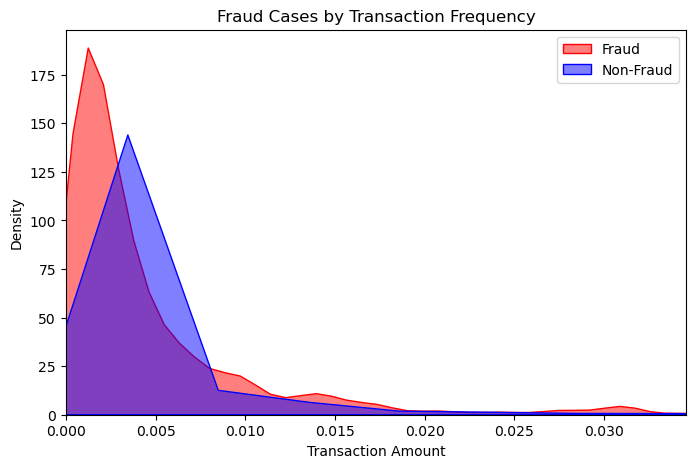

In [10]:
# Fraud Cases by Transaction Frequency**

plt.figure(figsize=(8, 5))

sns.kdeplot(train_df[train_df["isFraud"] == 1]["TransactionAmt"], fill=True, color="red", alpha=0.5, label="Fraud")
sns.kdeplot(train_df[train_df["isFraud"] == 0]["TransactionAmt"], fill=True, color="blue", alpha=0.5, label="Non-Fraud")

# Labels and title
plt.title("Fraud Cases by Transaction Frequency")
plt.xlabel("Transaction Amount")
plt.ylabel("Density")
plt.legend()
plt.xlim(0, train_df["TransactionAmt"].quantile(0.99))  # Remove extreme outliers for better visibility
plt.show()

Fraud Cases by Transaction Frequency:

Transaction amount distributions for fraudulent (1) and non-fraudulent (0) transactions are visualized using the kernel density estimation (KDE) plot. Within each category, the density curves show the frequency of various transaction amounts.

Since both fraudulent and non-fraudulent transactions (blue and red, respectively) peak at lower transaction amounts, the plot suggests that most transactions, regardless of fraud status, involve smaller amounts. The fact that the fraud curve is denser at the lowest transaction amounts, however, indicates that fraudulent activity is focused in smaller transactions. Both distributions drop off as transaction quantities rise, with very few high-value transactions.

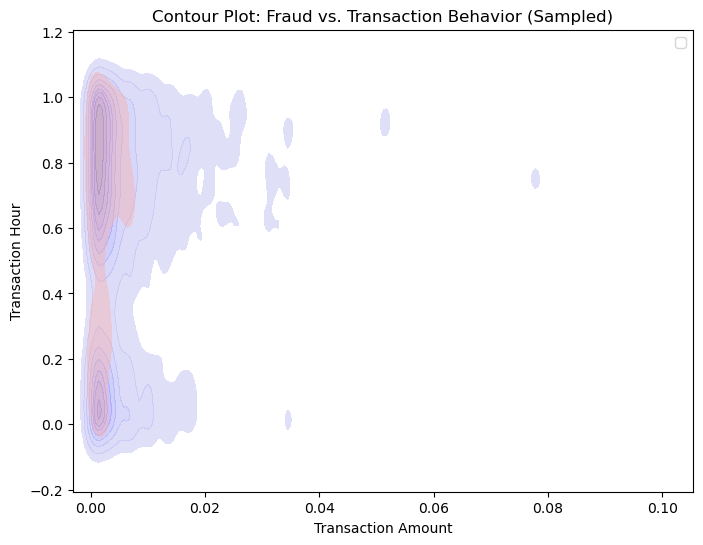

In [11]:
# Sample a subset of data to improve performance
sample_size = 5000  
sampled_df = train_df.sample(n=sample_size, random_state=42)

# KDE Contour Plot
plt.figure(figsize=(8, 6))
sns.kdeplot(
    x=sampled_df["TransactionAmt"], 
    y=sampled_df["TransactionHour"], 
    hue=sampled_df["isFraud"], 
    fill=True, 
    palette=["blue", "red"], 
    alpha=0.5,
    bw_adjust=0.5  # Reduce KDE bandwidth to speed up computation
)

plt.title("Contour Plot: Fraud vs. Transaction Behavior (Sampled)")
plt.xlabel("Transaction Amount")
plt.ylabel("Transaction Hour")
plt.legend(["Non-Fraud", "Fraud"])
plt.show()

Contour Plot: Fraud vs. Transaction Behavior (Sampled):

The contour plot, which separates fraudulent (1) from non-fraudulent (0) transactions, shows the link between transaction amount and transaction hour. To increase computational efficiency, a sampled subset of the dataset is used.

According to the plot, the lower transaction value range is where the majority of both fraudulent (red) and non-fraudulent (blue) transactions occur. According to the density contours, most activities take place during particular hours, and fraudulent transactions typically follow similar time patterns to those that are not. On the other hand, fraud instances seem to be more dispersed, which would suggest that different transaction times were used to conceal fraudulent activity.

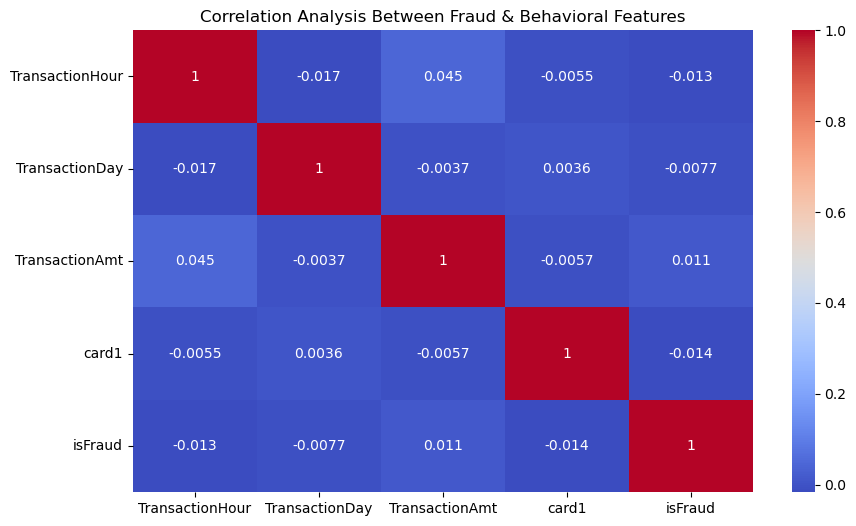

In [12]:
# Correlation Analysis with Behavioral Features**
correlation_features = ["TransactionHour", "TransactionDay", "TransactionAmt", "card1", "isFraud"]
corr_matrix = train_df[correlation_features].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True)
plt.title("Correlation Analysis Between Fraud & Behavioral Features")
plt.show()

Correlation Analysis Between Fraud & Behavioral Features:

The relationship between several behavioral traits and the incidence of fraud can be seen in the heatmap. Positive correlation values show a direct association, whereas negative correlation values imply an inverse relationship. Correlation values range from -1 to 1.

Every feature in the heatmap has a very poor link with fraud (isFraud). Transaction Amount (TransactionAmt) and fraud have a weakly positive association (0.011), suggesting that fraud is not highly predicted by transaction amount alone. Similarly, there are almost no relationships between fraud and Transaction Hour, Transaction Day, and Card Type (card1), indicating that these characteristics alone have little predictive potential.

In [13]:
#  Save Processed Data 
train_df.to_csv("fraud_detection_train_optimized.csv", index=False)
test_df.to_csv("fraud_detection_test_optimized.csv", index=False)